In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df[['v1', 'v2']]

In [5]:
df.columns = ['label', 'message']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rojinkoc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rojinkoc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rojinkoc/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    words = text.split()

    stop_words = set(stopwords.words('english'))
    
    clean_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(clean_words)

df['clean_msg'] = df['message'].apply(clean_text)

print(df[['message', 'clean_msg']].head())

                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                           clean_msg  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4                nah think go usf life around though  


In [10]:
X = df['clean_msg']
y = df['label']

In [11]:
print(X)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: clean_msg, Length: 5572, dtype: object


In [12]:
print(y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object


Text(0.5, 1.0, 'Mesajların Dağılımı (Normal vs Spam)')

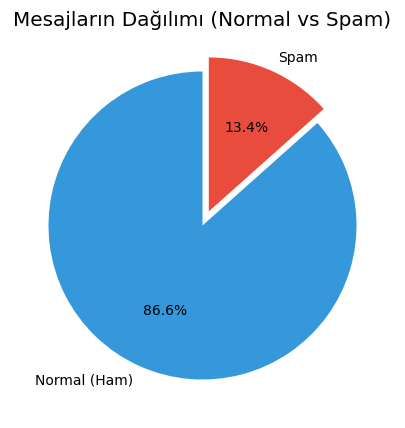

In [13]:
plt.style.use('ggplot')

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
counts = df['label'].value_counts()
plt.pie(counts, labels=['Normal (Ham)', 'Spam'], autopct='%1.1f%%', startangle=90, colors=['#3498db', '#e74c3c'], explode=(0, 0.1))
plt.title('Mesajların Dağılımı (Normal vs Spam)')

In [14]:
df.loc[df["label"] == "spam", "label"] = 1
df.loc[df["label"] == "ham", "label"] = 0

df['label'] = df['label'].astype(int)

print("Etiketler güncellendi (1=Spam, 0=Ham):")
print(df['label'].value_counts())

y = df['label']

Etiketler güncellendi (1=Spam, 0=Ham):
label
0    4825
1     747
Name: count, dtype: int64


In [15]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
print(f"Eğitim verisi sayısı: {len(X_train)}")
print(f"Test verisi sayısı: {len(X_test)}")

Eğitim verisi sayısı: 4457
Test verisi sayısı: 1115


In [18]:
tfidf = TfidfVectorizer(max_features=3000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

print(f"Eğitim Matrisi Boyutu: {X_train_vec.shape}")
print(f"Test Matrisi Boyutu: {X_test_vec.shape}")

Eğitim Matrisi Boyutu: (4457, 3000)
Test Matrisi Boyutu: (1115, 3000)


In [19]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_pred = nb_model.predict(X_test_vec)
nb_acc = accuracy_score(y_test, nb_pred)

In [20]:
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
lr_pred = lr_model.predict(X_test_vec)
lr_acc = accuracy_score(y_test, lr_pred)

In [21]:
print("="*40)
print(f"NAIVE BAYES SKORU: %{nb_acc*100:.2f}")
print("="*40)
print(classification_report(y_test, nb_pred))

print("\n" + "="*40)
print(f"LOGISTIC REGRESSION SKORU: %{lr_acc*100:.2f}")
print("="*40)
print(classification_report(y_test, lr_pred))

NAIVE BAYES SKORU: %97.22
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.98      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115


LOGISTIC REGRESSION SKORU: %97.22
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [22]:
X = df['clean_msg']
y = df['label'] # 1=Spam, 0=Ham 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tfidf = TfidfVectorizer(max_features=3000)
X_train_vec = tfidf.fit_transform(X_train) 
X_test_vec = tfidf.transform(X_test)       

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

acc = accuracy_score(y_test, nb_model.predict(X_test_vec))
print(f"Model Yeniden Eğitildi. Doğruluk Oranı: %{acc*100:.2f}")

def predict_spam_final(text):
    
    clean = clean_text(text)
    
    vec = tfidf.transform([clean])
    
    prediction = nb_model.predict(vec)
    
    if prediction[0] == 1:
        return "SPAM!"
    else:
        return "NORMAL MAIL"

Model Yeniden Eğitildi. Doğruluk Oranı: %97.22


In [23]:
print("\n--- TEST SONUÇLARI ---")
msg1 = "Congratulations! You've won a free ticket to Bahamas. Call now!"
msg2 = "Hey, can we meet tomorrow for the project review?"
msg3 = "Urgent! Your bank account is locked. Click here to verify."
msg4 = "I will be late for dinner tonight, mom."
msg5 = "WINNER!! As a valued network customer you have been selected to receivea 900 prize reward! To claim..."
msg6 = "Did I forget to tell you ? I want you , I need you, I crave you ... But most of all ... I love you m..."

print(f"1. '{msg1}' \n   -> SONUÇ: {predict_spam_final(msg1)}")
print(f"2. '{msg2}' \n   -> SONUÇ: {predict_spam_final(msg2)}")
print(f"3. '{msg3}' \n   -> SONUÇ: {predict_spam_final(msg3)}")
print(f"4. '{msg4}' \n   -> SONUÇ: {predict_spam_final(msg4)}")
print(f"5. '{msg5}' \n   -> SONUÇ: {predict_spam_final(msg5)}")
print(f"6. '{msg6}' \n   -> SONUÇ: {predict_spam_final(msg6)}")


--- TEST SONUÇLARI ---
1. 'Congratulations! You've won a free ticket to Bahamas. Call now!' 
   -> SONUÇ: SPAM!
2. 'Hey, can we meet tomorrow for the project review?' 
   -> SONUÇ: NORMAL MAIL
3. 'Urgent! Your bank account is locked. Click here to verify.' 
   -> SONUÇ: SPAM!
4. 'I will be late for dinner tonight, mom.' 
   -> SONUÇ: NORMAL MAIL
5. 'WINNER!! As a valued network customer you have been selected to receivea 900 prize reward! To claim...' 
   -> SONUÇ: SPAM!
6. 'Did I forget to tell you ? I want you , I need you, I crave you ... But most of all ... I love you m...' 
   -> SONUÇ: NORMAL MAIL


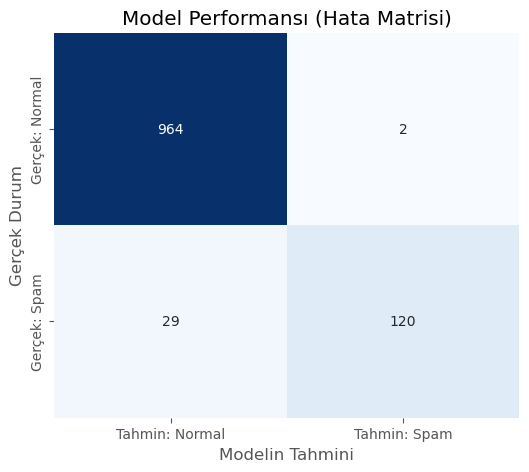

In [24]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, nb_model.predict(X_test_vec))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Tahmin: Normal', 'Tahmin: Spam'], 
            yticklabels=['Gerçek: Normal', 'Gerçek: Spam'])
plt.title('Model Performansı (Hata Matrisi)')
plt.ylabel('Gerçek Durum')
plt.xlabel('Modelin Tahmini')
plt.show()

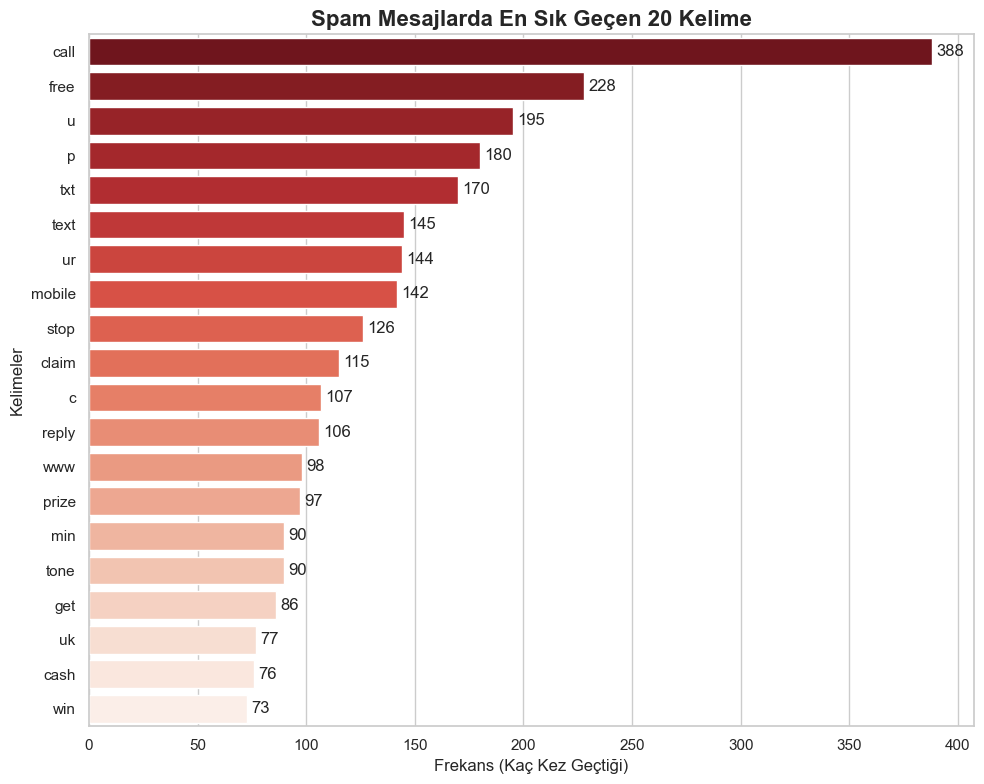

In [25]:
sns.set_theme(style="whitegrid")

spam_msgs = df[df['label'] == 1]['clean_msg']

all_spam_words = " ".join(spam_msgs).split()

word_counts = Counter(all_spam_words)

top_20_words = word_counts.most_common(20)

top_20_df = pd.DataFrame(top_20_words, columns=['Word', 'Count'])

plt.figure(figsize=(10, 8)) 

ax = sns.barplot(x='Count', y='Word', hue='Word', data=top_20_df, palette='Reds_r', legend=False)

plt.title('Spam Mesajlarda En Sık Geçen 20 Kelime', fontsize=16, fontweight='bold')
plt.xlabel('Frekans (Kaç Kez Geçtiği)', fontsize=12)
plt.ylabel('Kelimeler', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.tight_layout() 
plt.show()

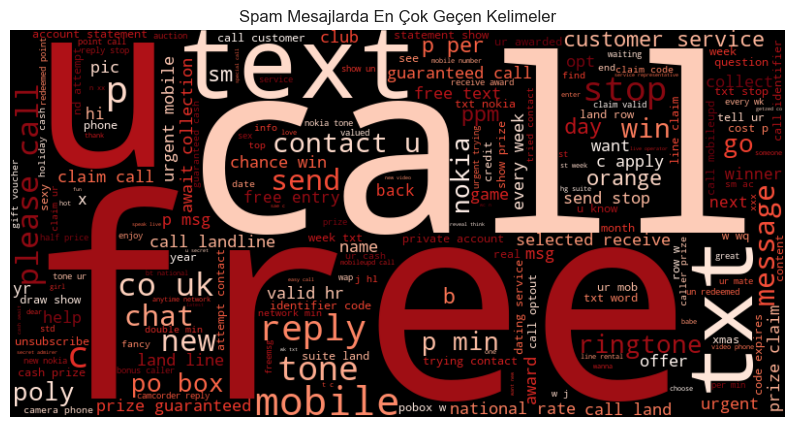

In [26]:
spam_text = " ".join(df[df['label'] == 1]['clean_msg'])

wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(spam_text)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') 
plt.title('Spam Mesajlarda En Çok Geçen Kelimeler')
plt.show()